### A PyTorch tutorial – the basics

In [1]:
import torch

In [2]:
x = torch.Tensor(2, 3)
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [3]:
x = torch.empty(5, 3)
print(x)

tensor([[9.9184e-39, 8.7245e-39, 9.2755e-39],
        [8.9082e-39, 9.9184e-39, 8.4490e-39],
        [9.6429e-39, 1.0653e-38, 1.0469e-38],
        [4.2246e-39, 1.0378e-38, 9.6429e-39],
        [9.2755e-39, 9.7346e-39, 1.0745e-38]])


In [4]:
x = torch.rand(2, 3)
print(x)

tensor([[0.6778, 0.9598, 0.4760],
        [0.3994, 0.3855, 0.2581]])


In [5]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [6]:
x = torch.ones(2,3)
y = torch.ones(2,3) * 2
w = x + y
print(w)

tensor([[3., 3., 3.],
        [3., 3., 3.]])


In [7]:
print(torch.add(x, y))

tensor([[3., 3., 3.],
        [3., 3., 3.]])


In [8]:
result = torch.empty(2,3)
torch.add(x, y, out=result)
print(result)

tensor([[3., 3., 3.],
        [3., 3., 3.]])


In [9]:
y[:,1] = y[:,1] + 1
print(y)

tensor([[2., 3., 2.],
        [2., 3., 2.]])


In [10]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [11]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


In [12]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [13]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


Tensor is the central class of the package. If you set its attribute .requires_grad as True, it starts to track all operations on it. When you finish your computation you can call `.backward()` and have all the gradients computed automatically. The gradient for this tensor will be accumulated into `.grad` attribute.

In [14]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [15]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


`y` was created as a result of an operation, so it has a `grad_fn`.

In [16]:
print(y.grad_fn)

In [17]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


Let’s backprop now. Because out contains a single scalar, `out.backward()` is equivalent to `out.backward(torch.tensor(1.))`.

In [18]:
out.backward()

Print gradients d(out)/dx

In [19]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [20]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([ 1461.3770, -1120.0551,  -522.6346], grad_fn=<MulBackward0>)


In [21]:
# Create tensors.
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

# Compute gradients.
y.backward()

# Print out the gradients.
print(x.grad)    # x.grad = 2 
print(w.grad)    # w.grad = 1 
print(b.grad)    # b.grad = 1 

tensor(2.)
tensor(1.)
tensor(1.)


In [22]:
# Create a numpy array.
x = np.array([[1, 2], [3, 4]])

# Convert the numpy array to a torch tensor.
y = torch.from_numpy(x)

# Convert the torch tensor to a numpy array.
z = y.numpy()

### PyTorch - Linear Regression

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

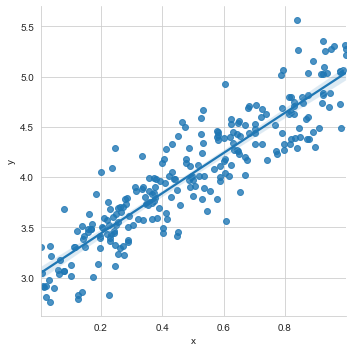

In [24]:
sns.set_style(style = 'whitegrid')
plt.rcParams["patch.force_edgecolor"] = True

m = 2 # slope
c = 3 # interceptm = 2 # slope
c = 3 # intercept
x = np.random.rand(256)

noise = np.random.randn(256) / 4

y = x * m + c + noise

df = pd.DataFrame()
df['x'] = x
df['y'] = y

sns.lmplot(x ='x', y ='y', data = df)

In [25]:
# Convert inputs and targets to tensors
inputs = torch.from_numpy(x)
targets = torch.from_numpy(y)

In [26]:
# Weights and biases
a = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
print(a)
print(b)

tensor([0.9519], requires_grad=True)
tensor([-0.0649], requires_grad=True)


In [27]:
def model(x):
    return x * a + b

In [28]:
# Generate predictions
preds = model(inputs)

In [29]:
# MSE loss
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

In [30]:
# Compute loss
loss = mse(preds, targets)
print(loss)

tensor(13.2510, dtype=torch.float64, grad_fn=<DivBackward0>)


In [31]:
# Compute gradients
loss.backward()

In [32]:
# Gradients for weights
print(a)
print(a.grad)
print(b)
print(b.grad)

tensor([0.9519], requires_grad=True)
tensor([-3.7174])
tensor([-0.0649], requires_grad=True)
tensor([-7.2388])


In [33]:
# Adjust weights & reset gradients
learning_rate = 0.1
with torch.no_grad():
    a -= a.grad * learning_rate
    b -= b.grad * learning_rate

In [34]:
print(a)
print(b)

tensor([1.3237], requires_grad=True)
tensor([0.6590], requires_grad=True)


In [35]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(7.4615, dtype=torch.float64, grad_fn=<DivBackward0>)


In [36]:
a.grad.zero_()
b.grad.zero_()
print(a.grad)
print(b.grad)

tensor([0.])
tensor([0.])


In [37]:
# Generate predictions
preds = model(inputs)

# Calculate the loss
loss = mse(preds, targets)

# Compute gradients
loss.backward()
print(loss)

tensor(7.4615, dtype=torch.float64, grad_fn=<DivBackward0>)


In [38]:
# Train for 500 epochs
learning_rate = 0.0001
for i in range(500):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        a -= a.grad * learning_rate * loss
        b -= b.grad * learning_rate * loss
        
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(0.1820, dtype=torch.float64, grad_fn=<DivBackward0>)


In [39]:
print(a)
print(b)

tensor([1.8482], requires_grad=True)
tensor([3.4483], requires_grad=True)


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [41]:
regressor = LinearRegression()  
regressor.fit(x.reshape(-1, 1), y.reshape(-1, 1)) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
print(regressor.coef_)
print(regressor.intercept_)

[[2.00214365]]
[3.03801201]


In [43]:
y_pred = regressor.predict(x.reshape(-1, 1))

In [44]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, preds.tolist()))  
print('Mean Squared Error:', metrics.mean_squared_error(y, preds.tolist()))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, preds.tolist())))

Mean Absolute Error: 0.36680808442973667
Mean Squared Error: 0.181971384839345
Root Mean Squared Error: 0.4265810413501109


In [45]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 0.206356626220492
Mean Squared Error: 0.06827341571079756
Root Mean Squared Error: 0.26129182097952774


In [46]:
df1 = pd.DataFrame({'x': x.flatten(), 'y': y.flatten(),  'Category': 'Actual'})
df2 = pd.DataFrame({'x': x.flatten(), 'y': y_pred.flatten(),  'Category': 'Predicted LM'})
df3 = pd.DataFrame({'x': x.flatten(), 'y': preds.tolist(),  'Category': 'Predicted Grad'})
frames = [df1, df2, df3]
df = pd.concat(frames)
display(df)

,x,y,Category
0,0.581216,4.444888,Actual
1,0.818665,4.378934,Actual
2,0.437962,3.980113,Actual
3,0.642713,4.272633,Actual
4,0.867836,4.575118,Actual
...,...,...,...
251,0.995620,5.288365,Predicted Grad
252,0.238064,3.888272,Predicted Grad
253,0.137844,3.703048,Predicted Grad
254,0.701400,4.744596,Predicted Grad


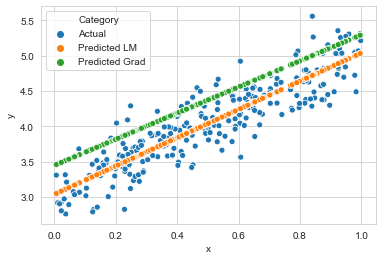

In [47]:
sns.scatterplot(x = 'x', y = 'y', data = df, hue = 'Category')

In [48]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 59], 
                   [87, 134, 68], 
                   [102, 43, 37], 
                   [70, 96, 79]], dtype='float32')
                   
# Targets (rice, wheat)
targets = np.array([[62, 71], 
                    [91, 102], 
                    [109, 123], 
                    [34, 43], 
                    [99, 111]], dtype='float32')

In [49]:
# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  59.],
        [ 87., 134.,  68.],
        [102.,  43.,  37.],
        [ 70.,  96.,  79.]])
tensor([[ 62.,  71.],
        [ 91., 102.],
        [109., 123.],
        [ 34.,  43.],
        [ 99., 111.]])


In [50]:
# Weights and biases
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[-0.4742, -0.6656, -0.6404],
        [ 1.2711,  0.2193, -1.3709]], requires_grad=True)
tensor([-1.0348, -0.1176], requires_grad=True)


In [51]:
def model(x):
    return x @ w.t() + b

In [52]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[-107.7806,   48.4147],
        [-140.5393,   53.9649],
        [-175.0233,   46.6302],
        [-101.7149,   88.2380],
        [-148.7145,    1.6089]], grad_fn=<AddBackward0>)


In [53]:
# Compare with targets
print(targets)

tensor([[ 62.,  71.],
        [ 91., 102.],
        [109., 123.],
        [ 34.,  43.],
        [ 99., 111.]])


In [54]:
# MSE loss
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

In [55]:
# Compute loss
loss = mse(preds, targets)
print(loss)

tensor(26554.8848, grad_fn=<DivBackward0>)


In [56]:
# Compute gradients
loss.backward()

In [57]:
# Gradients for weights
print(w)
print(w.grad)

tensor([[-0.4742, -0.6656, -0.6404],
        [ 1.2711,  0.2193, -1.3709]], requires_grad=True)
tensor([[-17871.4062, -19885.2441, -12973.1748],
        [ -3141.4399,  -4906.0342,  -3193.2959]])


In [58]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


In [59]:
# Generate predictions
preds = model(inputs)
print(preds)

# Calculate the loss
loss = mse(preds, targets)
print(loss)

# Compute gradients
loss.backward()
print(w.grad)
print(b.grad)

tensor([[-107.7806,   48.4147],
        [-140.5393,   53.9649],
        [-175.0233,   46.6302],
        [-101.7149,   88.2380],
        [-148.7145,    1.6089]], grad_fn=<AddBackward0>)
tensor(26554.8848, grad_fn=<DivBackward0>)
tensor([[-17871.4062, -19885.2441, -12973.1748],
        [ -3141.4399,  -4906.0342,  -3193.2959]])
tensor([-213.7545,  -42.2287])


In [60]:
# Adjust weights & reset gradients
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5

In [61]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(18130.0664, grad_fn=<DivBackward0>)


In [62]:
# Train for 500 epochs
for i in range(500):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()
        
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(102.4721, grad_fn=<DivBackward0>)


In [63]:
import torch.nn as nn

In [64]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], 
                   [102, 43, 37], [69, 96, 70], [73, 67, 43], 
                   [91, 88, 64], [87, 134, 58], [102, 43, 37], 
                   [69, 96, 70], [73, 67, 43], [91, 88, 64], 
                   [87, 134, 58], [102, 43, 37], [69, 96, 70]], 
                  dtype='float32')

# Targets (Rice, wheat)
targets = np.array([[56, 70], [81, 101], [119, 133], 
                    [22, 37], [103, 119], [56, 70], 
                    [81, 101], [119, 133], [22, 37], 
                    [103, 119], [56, 70], [81, 101], 
                    [119, 133], [22, 37], [103, 119]], 
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [65]:
from torch.utils.data import TensorDataset

# Define dataset
train_ds = TensorDataset(inputs, targets)

In [66]:
from torch.utils.data import DataLoader

# Define data loader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [67]:
# Define model
model = nn.Linear(3, 2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.5720, -0.2545, -0.1790],
        [ 0.4061,  0.1621,  0.1521]], requires_grad=True)
Parameter containing:
tensor([0.4535, 0.3312], requires_grad=True)


In [68]:
# Parameters
list(model.parameters())

[Parameter containing:
 tensor([[ 0.5720, -0.2545, -0.1790],
         [ 0.4061,  0.1621,  0.1521]], requires_grad=True),
 Parameter containing:
 tensor([0.4535, 0.3312], requires_grad=True)]

In [69]:
# Import nn.functional
import torch.nn.functional as F

In [70]:
# Define loss function
loss_fn = F.mse_loss

In [71]:
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(3958.4868, grad_fn=<MseLossBackward>)


In [72]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

In [73]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt, train_dl):
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        # Train with batches of data
        for xb,yb in train_dl:
            # 1. Generate predictions
            pred = model(xb)
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            # 3. Compute gradients
            loss.backward()
            # 4. Update parameters using gradients
            opt.step()
            # 5. Reset the gradients to zero
            opt.zero_grad()
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [74]:
fit(100, model, loss_fn, opt,train_dl)

Epoch [10/100], Loss: 1199.0513
Epoch [20/100], Loss: 658.6238
Epoch [30/100], Loss: 432.5333
Epoch [40/100], Loss: 257.9190
Epoch [50/100], Loss: 301.8743
Epoch [60/100], Loss: 218.3630
Epoch [70/100], Loss: 93.0286
Epoch [80/100], Loss: 139.7479
Epoch [90/100], Loss: 81.5543
Epoch [100/100], Loss: 43.1223


In [75]:
# Generate predictions
preds = model(inputs)
preds

tensor([[ 59.4103,  71.9817],
        [ 80.4775,  98.4727],
        [119.3590, 135.7850],
        [ 33.0955,  45.6716],
        [ 91.9650, 110.2909],
        [ 59.4103,  71.9817],
        [ 80.4775,  98.4727],
        [119.3590, 135.7850],
        [ 33.0955,  45.6716],
        [ 91.9650, 110.2909],
        [ 59.4103,  71.9817],
        [ 80.4775,  98.4727],
        [119.3590, 135.7850],
        [ 33.0955,  45.6716],
        [ 91.9650, 110.2909]], grad_fn=<AddmmBackward>)

In [76]:
# Compare with targets
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

Epoch [5/60], Loss: 0.2400
Epoch [10/60], Loss: 0.1990
Epoch [15/60], Loss: 0.1824
Epoch [20/60], Loss: 0.1756
Epoch [25/60], Loss: 0.1729
Epoch [30/60], Loss: 0.1718
Epoch [35/60], Loss: 0.1713
Epoch [40/60], Loss: 0.1711
Epoch [45/60], Loss: 0.1711
Epoch [50/60], Loss: 0.1710
Epoch [55/60], Loss: 0.1710
Epoch [60/60], Loss: 0.1710


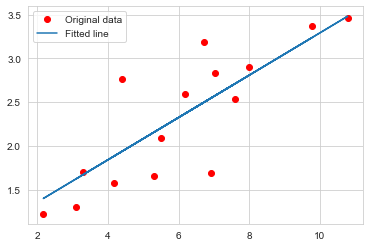

In [77]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

### Building and training neural networks

In [78]:
import torch
import torch.nn as nn

In [79]:
# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)
y = torch.randn(10, 2)

# Build a fully connected layer.
linear = nn.Linear(3, 2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build loss function and optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# Forward pass.
pred = linear(x)

# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.item())

# Backward pass.
loss.backward()

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

# 1-step gradient descent.
optimizer.step()

# You can also perform gradient descent at the low level.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

w:  Parameter containing:
tensor([[-0.3407, -0.5162, -0.3985],
        [ 0.0871, -0.0474,  0.5564]], requires_grad=True)
b:  Parameter containing:
tensor([-0.4088, -0.0573], requires_grad=True)
loss:  2.8697519302368164
dL/dw:  tensor([[-0.5152, -0.1117, -0.4364],
        [ 1.2764,  0.1743,  2.0995]])
dL/db:  tensor([-0.3246, -0.5023])
loss after 1 step optimization:  2.801781415939331


In [80]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# Randomly initialize weights
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    # Update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

99 620.6003554812341
199 2.286488102693101
299 0.012365520708359164
399 7.795244609673841e-05
499 5.300365488917739e-07


In [81]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-4
for t in range(500):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(x)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

99 3.0886523723602295
199 0.04625793918967247
299 0.0013110029976814985
399 4.744714897242375e-05
499 1.9103863451164216e-06


In [82]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
loss_fn = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam; the optim package contains many other
# optimization algorithms. The first argument to the Adam constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(500):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()

99 59.613563537597656
199 1.268034815788269
299 0.006619847845286131
399 1.1829908544314094e-05
499 6.3287859397576085e-09
